In [33]:
import logging
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint
import im_v2.ccxt.data.client as icdcl

In [2]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-79df2c54-c0cc-42b5-824e-8dd1211e4eea.json'
INFO  # Git
    branch_name='filtering_by_date_in_plot_bad_data_by_year_month_stats'
    hash='02a3c51da'
    # Last commits:
      * 02a3c51da Nina Lee suggestions for filtering by dates in `plot_bad_data_by_year_month_stats` (    2 days ago) Wed Jun 1 19:20:18 2022  (HEAD -> filtering_by_date_in_plot_bad_data_by_year_month_stats, origin/filtering_by_date_in_plot_bad_data_by_year_month_stats)
      * a310e9261 Nina Lee suggestions for filtering by dates in `plot_bad_data_by_year_month_stats` (    2 days ago) Wed Jun 1 18:09:15 2022           
      * 36f0da210 Nina Lee suggestions for filtering by dates in `plot_bad_data_by_year_month_stats` (    2 days ago) Wed Jun 1 18:07:46 2022           
# Machine info
    system=Linux
    node name=7c8c883ade3f
    release=5.13.0-1022-aws
    version=#24~20.04.1-Ubuntu SMP Thu Apr 7 22:10:15

In [4]:
resample_1min = True
root_dir = "s3://cryptokaizen-data/reorg/historical.manual.pq/"
partition = "by_year_month"
universe_version = "v3"
aws_profile = "ck"
ccxt_historical_client = icdcl.ccxt_clients.CcxtHistoricalPqByTileClient(
    universe_version,
    resample_1min,
    root_dir,
    partition,
    aws_profile=aws_profile,
)

In [38]:
full_symbol = ["binance::ADA_USDT"]
start_ts = pd.Timestamp("2018-08-17 00:00:00-0000")
end_ts = pd.Timestamp("2018-08-17 00:10:00-0000")
filter_data_mode = "assert"
data = ccxt_historical_client.read_data(
    full_symbol, start_ts, end_ts, columns=None, filter_data_mode=filter_data_mode
)
data.head(3)

,full_symbol,open,high,low,close,volume
timestamp,,,,,,
2018-08-17 00:00:00+00:00,binance::ADA_USDT,0.09460,0.09480,0.09442,0.09479,41334.2
2018-08-17 00:01:00+00:00,binance::ADA_USDT,0.09479,0.09480,0.09425,0.09473,98801.4
2018-08-17 00:02:00+00:00,binance::ADA_USDT,0.09434,0.09457,0.09421,0.09456,19992.1


<BarContainer object of 11 artists>

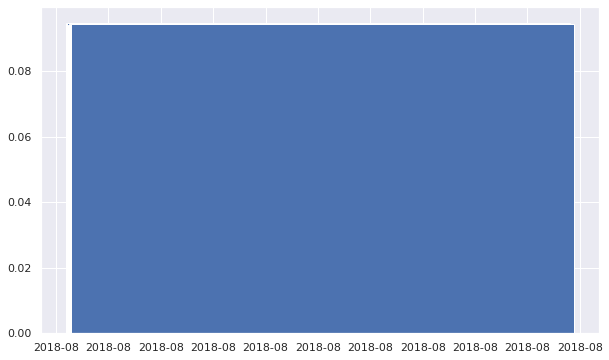

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.bar(data.index, data['close'])